# Stereographic Projections

In [1]:
from stereographic_functions import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

First define the lattice vectors- a, b and c for your crystal

In [61]:
latt_a = np.array((2.962,0,0))
latt_b = 2.962* np.array((-0.5,0.866,0))
latt_c = np.array((0,0,15.955))
lattice_vectors = [latt_a, latt_b, latt_c]

Then define a primary hkl of interest

In [68]:
hkl = (1,0,1)

You can view this plane in relation to your lattice using show_hkl()

<IPython.core.display.Javascript object>


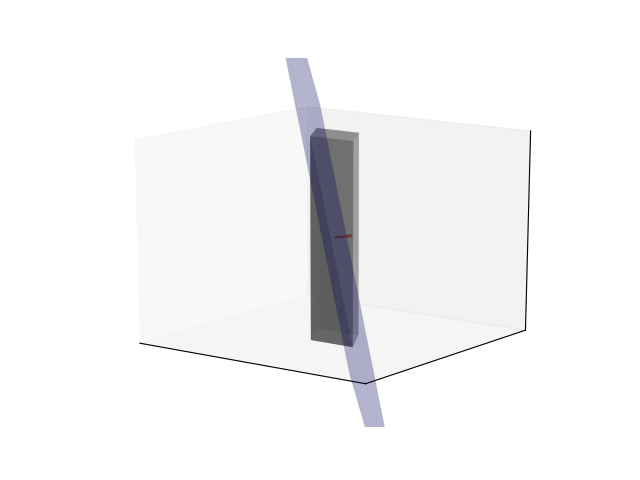

In [69]:
show_hkl(lattice_vectors, hkl, scale =2)

You can then see how this lattice plane is represented in a stereographic projection. The normal to the plane is shown intercepting the surface of a sphere. This point is then projected down onto the equatorial plane following the path to the opposite pole (this maintains angular relationships). The circle created when the plane intercepts the sphere is also projected onto the equatorial plane in a similar manner -- this is called the trace

<IPython.core.display.Javascript object>


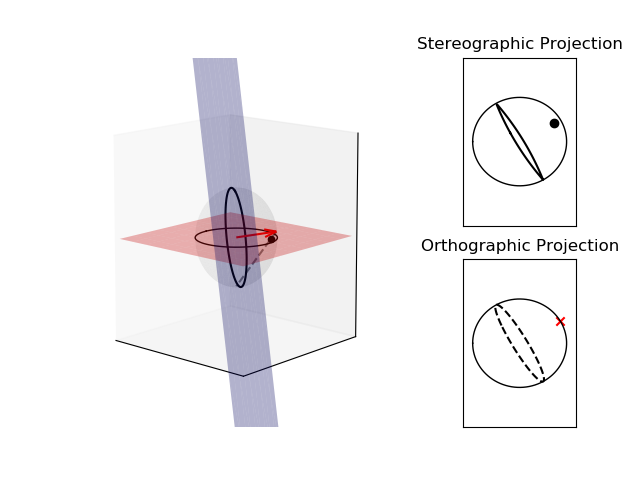

In [70]:
single_vector_display(lattice_vectors, hkl)

You can then create the stereogram for a range of hkl planes by specifing the range of hs, ks and ls you would like to sample

<IPython.core.display.Javascript object>


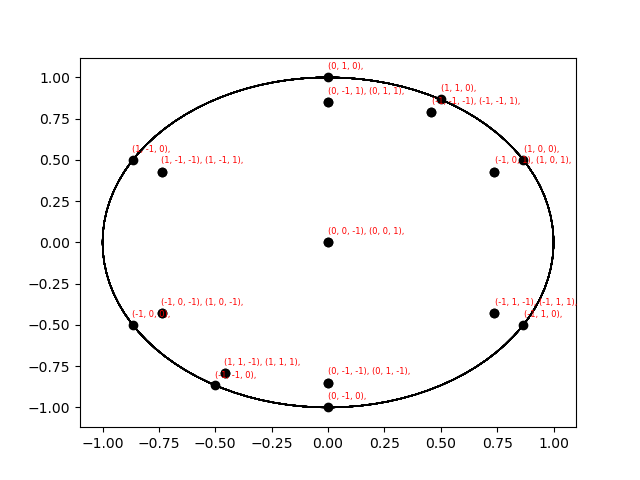

In [71]:
hs = [-1,0,1]
ks = [-1,0,1]
ls = [-1,0,1]
display_stereograph(lattice_vectors, hs, ks, ls, factor = 1e-10, show_trace = False, four_index_notation = False)

In [7]:
#some example lattice parameters:
#Cube
'''
latt_a = np.array((1,0,0))
latt_b = np.array((0,1,0))
latt_c = np.array((0,0,1))
'''
#Rbar3m
'''
latt_a = np.array((2.962,0,0))
latt_b = 2.962* np.array((-0.5,0.866,0))
latt_c = np.array((0,0,15.955))
'''
#P63/mmc
'''
latt_a = np.array((2.885,0,0))
latt_b = 2.885* np.array((-0.5,0.866,0))
latt_c = np.array((0,0,11.155))
'''

'\nlatt_a = np.array((2.885,0,0))\nlatt_b = 2.885* np.array((-0.5,0.866,0))\nlatt_c = np.array((0,0,11.155))\n'